***Загрузка скриптов и библиотек***

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

%matplotlib inline
sns.set(rc={'figure.figsize':(16,6)})
sns.set(font_scale=2)
import warnings
warnings.filterwarnings('ignore')

/Users/ipad1/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


**Задание 1**

- Попробуйте, пожалуйста, написать код для решения задачи по данным во вложении: напишите на любом известном Вам языке код для расчета линейной ценовой эластичности. Можете пренебречь всеми характеристиками рынка, кроме цены и объема продаж. Пришлите, пожалуйста, код и результат расчета для двух продуктов (в файле это два массива данных – значения по объемам и по ценам по неделям).
- Какие выводы можно сделать на основе полученных эластичностей  для работы с планированием цен и объемов?

________________

**Решение**

***Загружу данные в датафрейм***

In [2]:
data = pd.read_excel('./Case Interview.xlsx')

***Посмотрю размер датафрейма***

In [3]:
data.shape

(206, 20)

***Посмотрю есть ли пустые значения***

In [4]:
data.isna().sum()

WEEK                  0
UNITS                 0
 PRICE                0
winston ks blue     206
Unnamed: 4          206
Unnamed: 5          206
WEEK.1              153
UNITS.1             153
PRICE               153
neo ksss mint cl    206
Unnamed: 10         206
Unnamed: 11         205
Unnamed: 12         206
Unnamed: 13         206
Unnamed: 14         206
Unnamed: 15         206
Unnamed: 16         206
Unnamed: 17         206
Unnamed: 18         206
Unnamed: 19         206
dtype: int64

***Удалю лишние столбцы***

In [5]:
data = data.drop(columns=['neo ksss mint cl',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'winston ks blue', 'Unnamed: 4',
       'Unnamed: 5', 'WEEK.1','WEEK'])

***Переименую столбцы для удобства***

In [6]:
data = data.rename(columns={'UNITS': 'volume_winston_ks_blue',
                            ' PRICE ': 'price_winston_ks_blue',
                           'UNITS.1': 'volume_neo_ksss_mint_cl',
                           'PRICE':'price_neo_ksss_mint_cl'})

***Вот так лучше***

In [7]:
data.head(5)

,volume_winston_ks_blue,price_winston_ks_blue,volume_neo_ksss_mint_cl,price_neo_ksss_mint_cl
0,2808220,93,41880.00,130.00
1,2857360,92,42360.00,130.00
2,2945260,92,48260.00,130.00
3,2874480,94,51700.00,130.00
4,2914040,94,57840.00,130.00


***По neo_ksss_mint_cl наблюдений что-то меньше, чем по winston_ks_blue, нужно посмотреть, где обрываются данные***

In [8]:
data.loc[data['volume_neo_ksss_mint_cl'].isna()].head()

,volume_winston_ks_blue,price_winston_ks_blue,volume_neo_ksss_mint_cl,price_neo_ksss_mint_cl
53,2715120,111,nan,nan
54,2733580,111,nan,nan
55,2691540,111,nan,nan
56,2781260,111,nan,nan
57,2747120,111,nan,nan


***Начиная с 54 неделю у winston_ks_blue данные есть, а у neo_ksss_mint_cl данных нет***

***Разобью, пожалуй эти два датасета и буду изучать их по отдельности***

In [9]:
winston_data = data[['volume_winston_ks_blue', 'price_winston_ks_blue']]
neo_data = data[['volume_neo_ksss_mint_cl','price_neo_ksss_mint_cl']]

In [10]:
winston_data.shape, neo_data.shape

((206, 2), (206, 2))

***Как видно выше размерность сохранилась, но для neo я это поправлю***

In [11]:
neo_data = neo_data.iloc[:53]

***Посмотрим конец датасета neo_ksss_mint_cl***

In [12]:
neo_data.tail()

,volume_neo_ksss_mint_cl,price_neo_ksss_mint_cl
48,62040.00,135.00
49,63760.00,135.00
50,68240.00,135.00
51,66940.00,135.00
52,73860.00,139.95


****Анализ Winstone****

***Нарисую для визуализации***

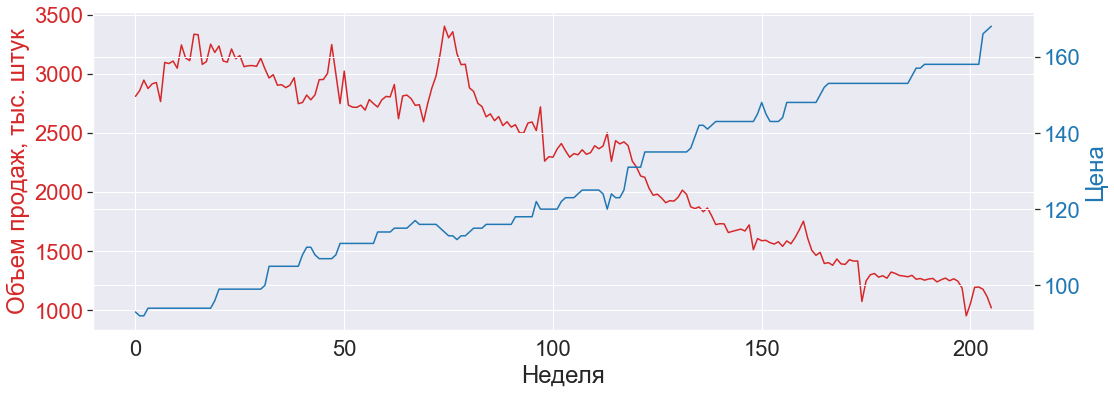

In [13]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Неделя')
ax1.set_ylabel('Объем продаж, тыс. штук', color=color)
ax1.plot(winston_data.index, winston_data['volume_winston_ks_blue']/1000, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Цена', color=color)  # we already handled the x-label with ax1
ax2.plot(winston_data.index, winston_data['price_winston_ks_blue'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

***Как видно из графика, цена последовательно растет, за исключением незначительных небольших отскоков. А объем продаж последовательно сокращается. Отдельный интерес вызывает ситуация между 72 и 77 неделей, когда цена уменьшилась на 3 рубля (2,5%), а объем продаж увеличился 474600 штук (16.5%) Однако это не входит в данное задание, просто отметил***

***Нарисую дополнительно зависимость объема продаж от цены***

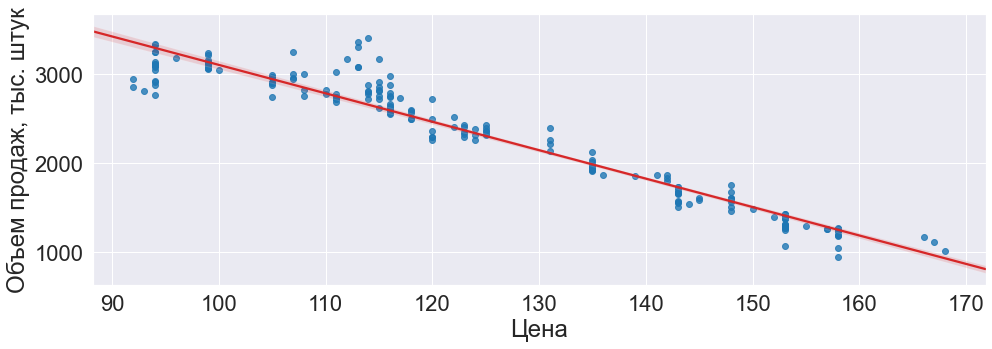

In [14]:
sns.set(rc={'figure.figsize':(16,5)})
sns.set(font_scale=2)
ax = sns.regplot(x='price_winston_ks_blue', y=winston_data['volume_winston_ks_blue']/1000,\
                 data=winston_data, truncate=False,\
                 scatter_kws={"color": "tab:blue"}, line_kws={"color": "tab:red"})
ax = ax.set(ylabel='Объем продаж, тыс. штук', xlabel='Цена')

***Как видно есть четкая взаимосвязь объема и цены, однако отдельный интерес вызывает объем между 110 и 120 (слишком много выбросов), но это вне данного задания***

***На основании только данных по цене сделаю линейный регрессионный анализ***

***Выделяю X и y для модели***

In [15]:
X = winston_data[['price_winston_ks_blue']]
y = winston_data['volume_winston_ks_blue']

***Формирую модель линейной регрессии***

In [16]:
model = LinearRegression()

***Обучаю модель***

In [17]:
model.fit(X,y)

LinearRegression()

***Посмотрю как по качеству***

In [18]:
model.score(X,y)

0.9379629291807283

***Здорово, конечно, цена объясняет 93% изменение объема, если не брать в расчет кучу других показателей (в одной модели, пока я готовил это задания я даже видел, что исследователи как факторы определяли погоду, пандемии, и другие внешние факторы в моделировании продаж)***

***В чем хороша линейная регрессия, так это в простоте ей интерпритации:***

In [19]:
round(model.intercept_), round(model.coef_[0])

(6290071, -31877)

***В итоге формула линейной ценовой эластичности имееет следующий вид:***
$$ f(x) = 6290071 - 31877*price$$

In [20]:
print('Каждое увеличение цены на 1 пункт, уменьшит объем продаж winston_ks_blue на:',\
      round(model.coef_[0]),'пачки.')
print('Или блока, я не знаю, в чем мы меряем объем')

Каждое увеличение цены на 1 пункт, уменьшит объем продаж winston_ks_blue на: -31877 пачки.
Или блока, я не знаю, в чем мы меряем объем


**Сделаю быстро все для neo_ksss_mint_cl**

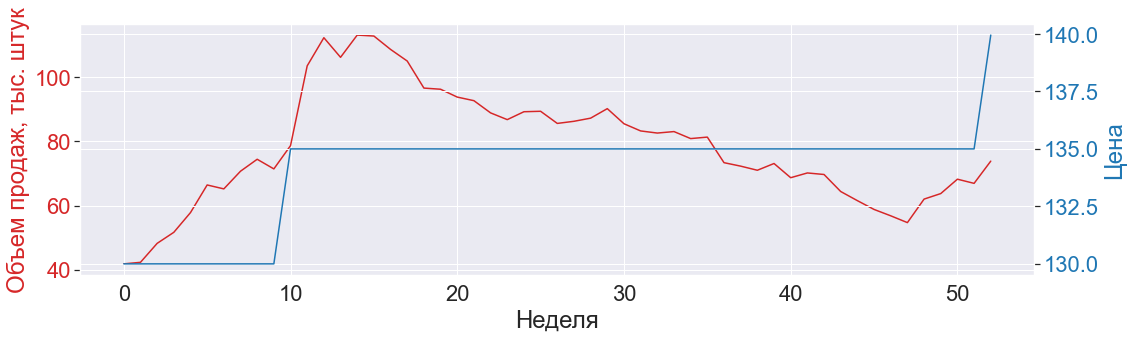

In [21]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Неделя')
ax1.set_ylabel('Объем продаж, тыс. штук', color=color)
ax1.plot(neo_data.index, neo_data['volume_neo_ksss_mint_cl']/1000, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Цена', color=color)  # we already handled the x-label with ax1
ax2.plot(neo_data.index, neo_data['price_neo_ksss_mint_cl'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

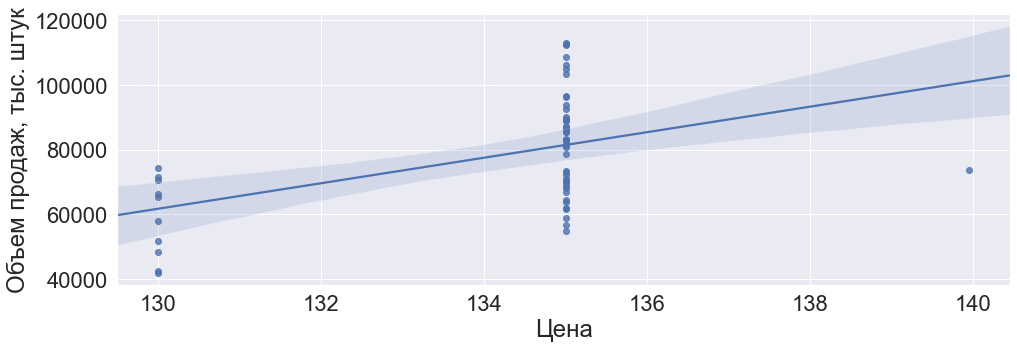

In [22]:
ax = sns.regplot(x='price_neo_ksss_mint_cl', y='volume_neo_ksss_mint_cl', data=neo_data, truncate=False)
ax = ax.set(ylabel='Объем продаж, тыс. штук', xlabel='Цена')

***Здесь все иначе относительно распределения цен, цена очень долго находилась на уровне в 135, при этом объем постоянно падал, однако после 47 недели опять начал расти, и даже продолжил расти когда цена увеличилась до 140, линейная зависимость здесь не очень усматривается, да и сам датафрейм достаточно маленький (я, конечно сделаю все в заданиии согласно требованию, однако это может быть очень неточным)***

In [23]:
X = neo_data[['price_neo_ksss_mint_cl']]
y = neo_data['volume_neo_ksss_mint_cl']

In [24]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.2212407846613913

***В целом, что и следовало ожидать, линейная модель не может уловить взаимосвязи, изменение объема из-за цены объяснется только на 22%***

***Как оффтопик, могу предложить рассмотреть другие регрессионные модели***

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle = True, random_state=42)

In [26]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 88%|████████▊ | 37/42 [00:00<00:00, 42.73it/s]

OrthogonalMatchingPursuitCV model failed to execute
Found array with 1 feature(s) (shape=(42, 1)) while a minimum of 2 is required by OrthogonalMatchingPursuitCV.


100%|██████████| 42/42 [00:00<00:00, 47.42it/s]


In [27]:
models[:5]

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
BaggingRegressor,0.13,0.22,18340.20,0.03
GaussianProcessRegressor,0.13,0.21,18375.56,0.01
ExtraTreesRegressor,0.13,0.21,18375.57,0.07
DecisionTreeRegressor,0.13,0.21,18375.57,0.01
ExtraTreeRegressor,0.13,0.21,18375.57,0.01


***Ну по ним тоже пальцем в небо, нужно больше данных***

***Отвечу как того того требует задание, относительно линейнего коэффициента эластичности***

In [28]:
round(model.intercept_), round(model.coef_[0])

(-451621, 3949)

***В итоге формула линейной ценовой эластичности имееет следующий вид:***
$$ f(x) = -451621 + 3949*price$$

In [29]:
print('Каждое увеличение цены 1 пункт, увеличит объем продаж neo_ksss_mint_cl на:',\
      round(model.coef_[0]),'пачки.')
print('Или блока, я не знаю, в чем мы меряем объем')

Каждое увеличение цены 1 пункт, увеличит объем продаж neo_ksss_mint_cl на: 3949 пачки.
Или блока, я не знаю, в чем мы меряем объем


***Однако, я считаю, что это, в целом, суждение ошибочно и обусловлено маленькой наблюдательной базой и отсутствие влияния других факторов***

__________